In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
import seaborn as sns

/Users/clement/Applications/anaconda/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/clement/Applications/anaconda/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/clement/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_stata('data/FinalAdminData.dta',convert_categoricals=False)
df.to_csv('data/dataset1.csv', index=None)

In [3]:
df.tarifa.unique()

array([1, 8, 3, 2, 6, 4, 7, 5])

In [17]:
FEATURES = ['tarifa', 'year', 'month', 'cve_ent', 'regiontarif', \
            'appl_season', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'p0',\
            'p1', 'p2', 'p3', 'p4', 'p5', 'pobreza', 'pobreza_e', 'pobreza_m',\
            'vul_car', 'vul_ing', 'npnv', 'ic_rezedu', 'ic_asalud', 'ic_segsoc',\
            'ic_cv', 'ic_sbv', 'ic_ali', 'carencias3', 'plb', 'plb_m', 'gini_10']

#FEATURES = ['tarifa', 'year', 'month', 'cve_ent', 'regiontarif',  'pobreza', 'pobreza_e', 'pobreza_m', 'vul_car', 'vul_ing', 'npnv', 'ic_rezedu', 'ic_asalud', 'ic_segsoc', 'ic_cv', 'ic_sbv', 'ic_ali', 'carencias3', 'plb', 'plb_m', 'gini_10']

TARGETS = ['xb0',
 'xb1',
 'xb2',
 'xb3',
 'xb4',
 'xb5']

b_i = ['b'+str(i) for i in range(0,6)]
p_i = ['p'+str(i) for i in range(0,6)]
xb_i = ['xb'+str(i) for i in range(0,6)]

df.drop_duplicates(inplace=True)
print df.info()

df_clean = df[FEATURES+TARGETS]#[(~df.b0.isnull())&(~df.p0.isnull())]

df_clean[b_i+p_i+xb_i]= df_clean[b_i+p_i+xb_i].fillna(0)

print df_clean.isnull().sum()

df_clean = df_clean.dropna()
print df_clean.shape

print df_clean.tarifa.unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 459564 entries, 0 to 459563
Columns: 112 entries, estatal to _merge
dtypes: datetime64[ns](1), float32(27), float64(58), int16(3), int32(1), int8(14), object(8)
memory usage: 296.3+ MB
None
tarifa           0
year             0
month            0
cve_ent          0
regiontarif      0
appl_season      0
b0               0
b1               0
b2               0
b3               0
b4               0
b5               0
p0               0
p1               0
p2               0
p3               0
p4               0
p5               0
pobreza          0
pobreza_e      168
pobreza_m        0
vul_car          0
vul_ing          0
npnv             0
ic_rezedu        0
ic_asalud        0
ic_segsoc        0
ic_cv            0
ic_sbv           0
ic_ali           0
carencias3       0
plb              0
plb_m          168
gini_10          0
xb0              0
xb1              0
xb2              0
xb3              0
xb4              0
xb5              0


In [18]:
clf = RandomForestRegressor()

X = df_clean[FEATURES]
y = df_clean[TARGETS]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train,y_train)

prediction = clf.predict(X_test.values)
print r2_score(y_test.values,prediction)
print mean_squared_error(y_test.values,prediction)

1.0
0.0


/Users/clement/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [19]:
df_prediction = pd.DataFrame(prediction,columns=[TARGETS])

In [20]:
df_prediction.head()

,xb0,xb1,xb2,xb3,xb4,xb5
0,103.692307,216.428574,390.230774,765.714294,0.0,0.0
1,44.000000,107.000000,199.759995,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,44.000000,107.000000,199.759995,0.000000,0.0,0.0


In [21]:
y_test.head()

,xb0,xb1,xb2,xb3,xb4,xb5
362245,103.692307,216.428574,390.230774,765.714294,0.0,0.0
17527,44.000000,107.000000,199.759995,0.000000,0.0,0.0
310929,0.000000,0.000000,0.000000,0.000000,0.0,0.0
42158,0.000000,0.000000,0.000000,0.000000,0.0,0.0
33799,44.000000,107.000000,199.759995,0.000000,0.0,0.0


Feature ranking:
1. feature 9 (0.470143)
2. feature 14 (0.207418)
3. feature 8 (0.108047)
4. feature 10 (0.061925)
5. feature 12 (0.050498)
6. feature 6 (0.047519)
7. feature 7 (0.027289)
8. feature 17 (0.022017)
9. feature 0 (0.003584)
10. feature 11 (0.000738)
11. feature 13 (0.000353)
12. feature 15 (0.000353)
13. feature 5 (0.000116)
14. feature 1 (0.000000)
15. feature 4 (0.000000)
16. feature 3 (0.000000)
17. feature 2 (0.000000)
18. feature 33 (0.000000)
19. feature 32 (0.000000)
20. feature 18 (0.000000)
21. feature 19 (0.000000)
22. feature 20 (0.000000)
23. feature 21 (0.000000)
24. feature 22 (0.000000)
25. feature 23 (0.000000)
26. feature 24 (0.000000)
27. feature 25 (0.000000)
28. feature 26 (0.000000)
29. feature 27 (0.000000)
30. feature 28 (0.000000)
31. feature 29 (0.000000)
32. feature 30 (0.000000)
33. feature 31 (0.000000)
34. feature 16 (0.000000)


(-1, 34)

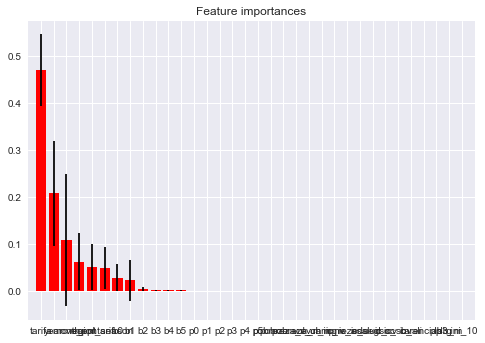

In [22]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), FEATURES)
plt.xlim([-1, X.shape[1]])

In [23]:
df_clean.corr()[TARGETS]

,xb0,xb1,xb2,xb3,xb4,xb5
tarifa,-0.633602,-0.593008,-0.457665,-0.022506,-0.225708,0.025947
year,0.031505,0.018482,0.303232,-0.005450,-0.408396,-0.035045
month,0.012303,0.014883,0.035061,0.014310,-0.027498,0.001389
cve_ent,0.007939,0.013480,0.010517,0.008319,0.000379,0.006094
regiontarif,-0.136166,-0.147511,-0.120541,-0.178297,-0.075623,-0.067656
appl_season,-0.187730,-0.177423,-0.105983,-0.285710,-0.103554,-0.041787
b0,0.964512,0.975772,0.719258,0.552643,0.430254,0.110246
b1,0.936334,0.985827,0.755535,0.704489,0.446155,0.217822
b2,0.358491,0.322576,0.603723,-0.212384,-0.330795,-0.023633
b3,0.522714,0.505511,0.519523,0.764618,-0.085495,-0.006001


/Users/clement/Applications/anaconda/lib/python2.7/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/clement/Applications/anaconda/lib/python2.7/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/Users/clement/Applications/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/clement/Applications/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


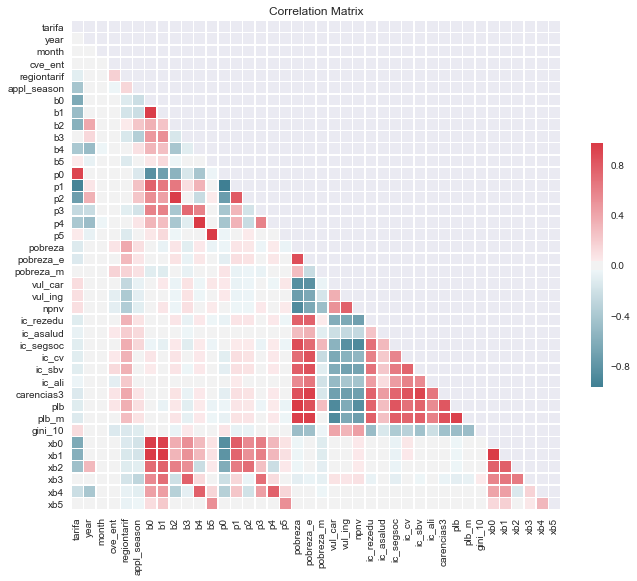

In [24]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlation Matrix")

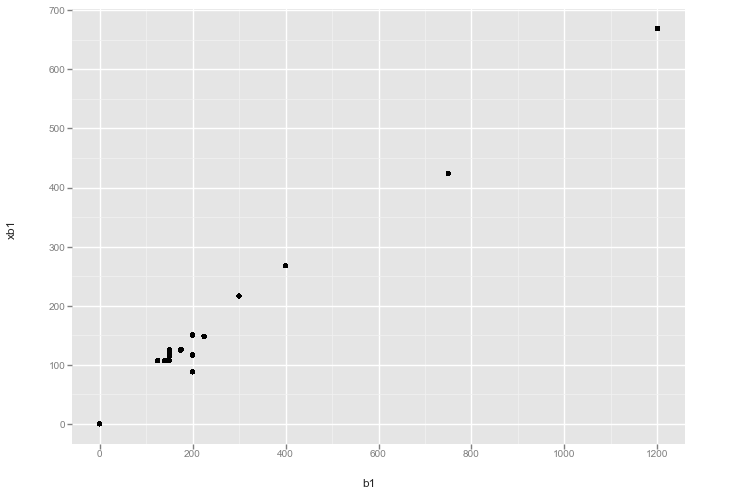

<ggplot: (427922165)>

In [25]:
ggplot(df_clean,aes(x='b0',y='xb0'))+ geom_jitter(position = 'jitter', stat = 'identity')
ggplot(df_clean,aes(x='b1',y='xb1'))+ geom_jitter(position = 'jitter', stat = 'identity')

In [ ]:
sns.pairplot(df_clean[b_i+p_i+xb_i+['tarifa']], hue="tarifa")